<a href="https://colab.research.google.com/github/FMurunga/DataScience-Projects/blob/main/Supermarket_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#How to read the file from the local machine
#from google.colab import files
#uploaded = files.upload()

In [ ]:
#Read the file from Github
import pandas as pd
df=pd.read_csv('https://raw.github.com/FMurunga/SuperMarket-Sales-Prediction/main/supermarket_sales.csv')
df

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,01/05/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,03/08/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,03/03/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,02/08/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,03/02/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,02/09/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1


In [ ]:
#If reading an uploaded file
#wrap your uploaded bytes in an io.StringIO since read_csv expects a file-like object.
#import pandas as pd
#import io
#read the file into a dataframe df
#df = pd.read_csv(io.StringIO(uploaded['supermarket_sales.csv'].decode('utf-8')))
#df

In [ ]:
  #Check for null values
print(df.isnull().sum())

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64


Create Visualizations

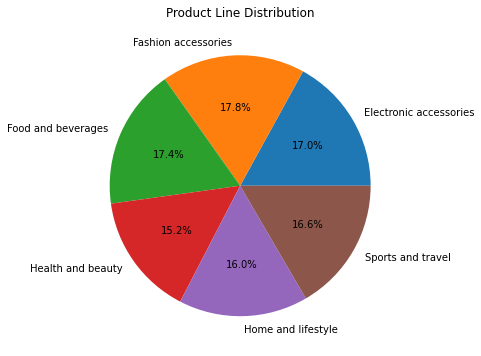

In [ ]:
#1. PIE CHART 
#PIE CHART SHOWING THE DISTRIBUTION OF THE PRODUCT LINES
import matplotlib.pyplot as plt
_, ax = plt.subplots(figsize=(10,6))
df.groupby("Product line").size().plot(kind='pie', autopct='%1.1f%%')
ax.set_title("Product Line Distribution")
ax.set_ylabel('')
plt.show()

#Fashion accessories made the highest sales

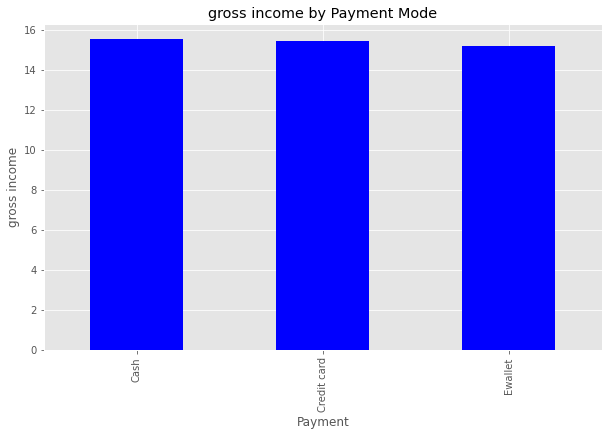

In [ ]:
#2.BAR GRAPH
#Bar Graph Showing distriution of gross Income of customers by city
import matplotlib.pyplot as plt
plt.style.use('ggplot')
_, ax = plt.subplots(figsize=(10,6))
#Use a categorical and a nominal variable
df.groupby("Payment")['gross income'].mean().plot(kind='bar', color='blue')
ax.set_title("gross income by Payment Mode")
ax.set_ylabel('gross income')
ax.set_xlabel('Payment')
plt.show()

#Result: Cash Payers generated the most income

SCATTER PLOT

A scatter plot (aka scatter chart, scatter graph) uses dots to represent values for two different numeric variables. The position of each dot on the horizontal and vertical axis indicates values for an individual data point. Scatter plots are used to observe relationships between variables.

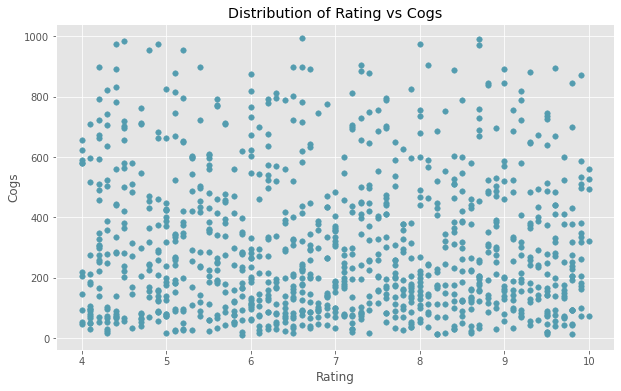

In [ ]:
#3.scatter plot
import matplotlib.pyplot as plt
_, ax = plt.subplots(figsize=(10,6))
ax.scatter(df['Rating'], df['cogs'],s = 30, color = '#539caf', alpha = 1.00)
ax.set_title('Distribution of Rating vs Cogs')
ax.set_xlabel('Rating')
ax.set_ylabel('Cogs')
plt.show()

In [ ]:
df.corr()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
Unit price,1.000000,0.010778,0.633962,0.633962,0.633962,NaN,0.633962,-0.008778
Quantity,0.010778,1.000000,0.705510,0.705510,0.705510,NaN,0.705510,-0.015815
Tax 5%,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442
Total,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442
cogs,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442
gross margin percentage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gross income,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442
Rating,-0.008778,-0.015815,-0.036442,-0.036442,-0.036442,NaN,-0.036442,1.000000


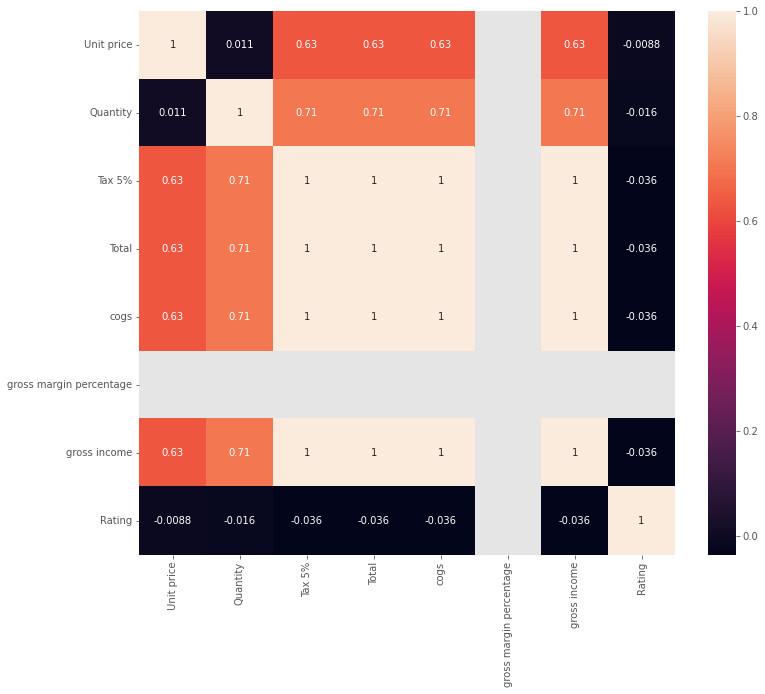

In [ ]:
#Heat Map Diagram

import seaborn as sn
plt.figure(figsize = (12,10))

sn.heatmap(df.corr(), annot =True)

BOXPLOT

A boxplot is a standardized way of displaying the distribution of data based on a five number summary (“minimum”, first quartile (Q1), median, third quartile (Q3), and “maximum”). ... It can also tell you if your data is symmetrical, how tightly your data is grouped, and if and how your data is skewed.

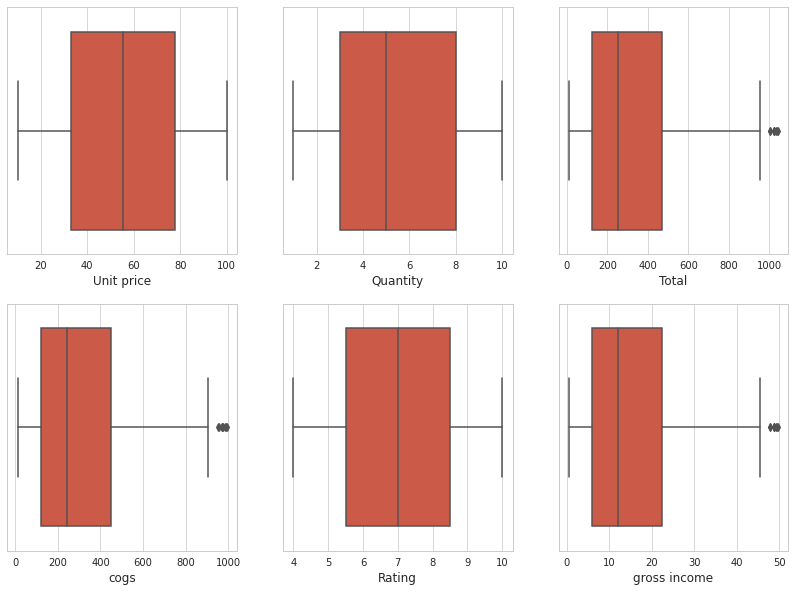

In [ ]:
plt.figure(figsize=(14,10))
sn.set_style(style='whitegrid')
plt.subplot(2,3,1)
sn.boxplot(x='Unit price',data=df)
plt.subplot(2,3,2)
sn.boxplot(x='Quantity',data=df)
plt.subplot(2,3,3)
sn.boxplot(x='Total',data=df)
plt.subplot(2,3,4)
sn.boxplot(x='cogs',data=df)
plt.subplot(2,3,5)
sn.boxplot(x='Rating',data=df)
plt.subplot(2,3,6)
sn.boxplot(x='gross income',data=df)

PAIRPLOT

A pairplot plot a pairwise relationships in a dataset. The pairplot function creates a grid of Axes such that each variable in data will by shared in the y-axis across a single row and in the x-axis across a single column.

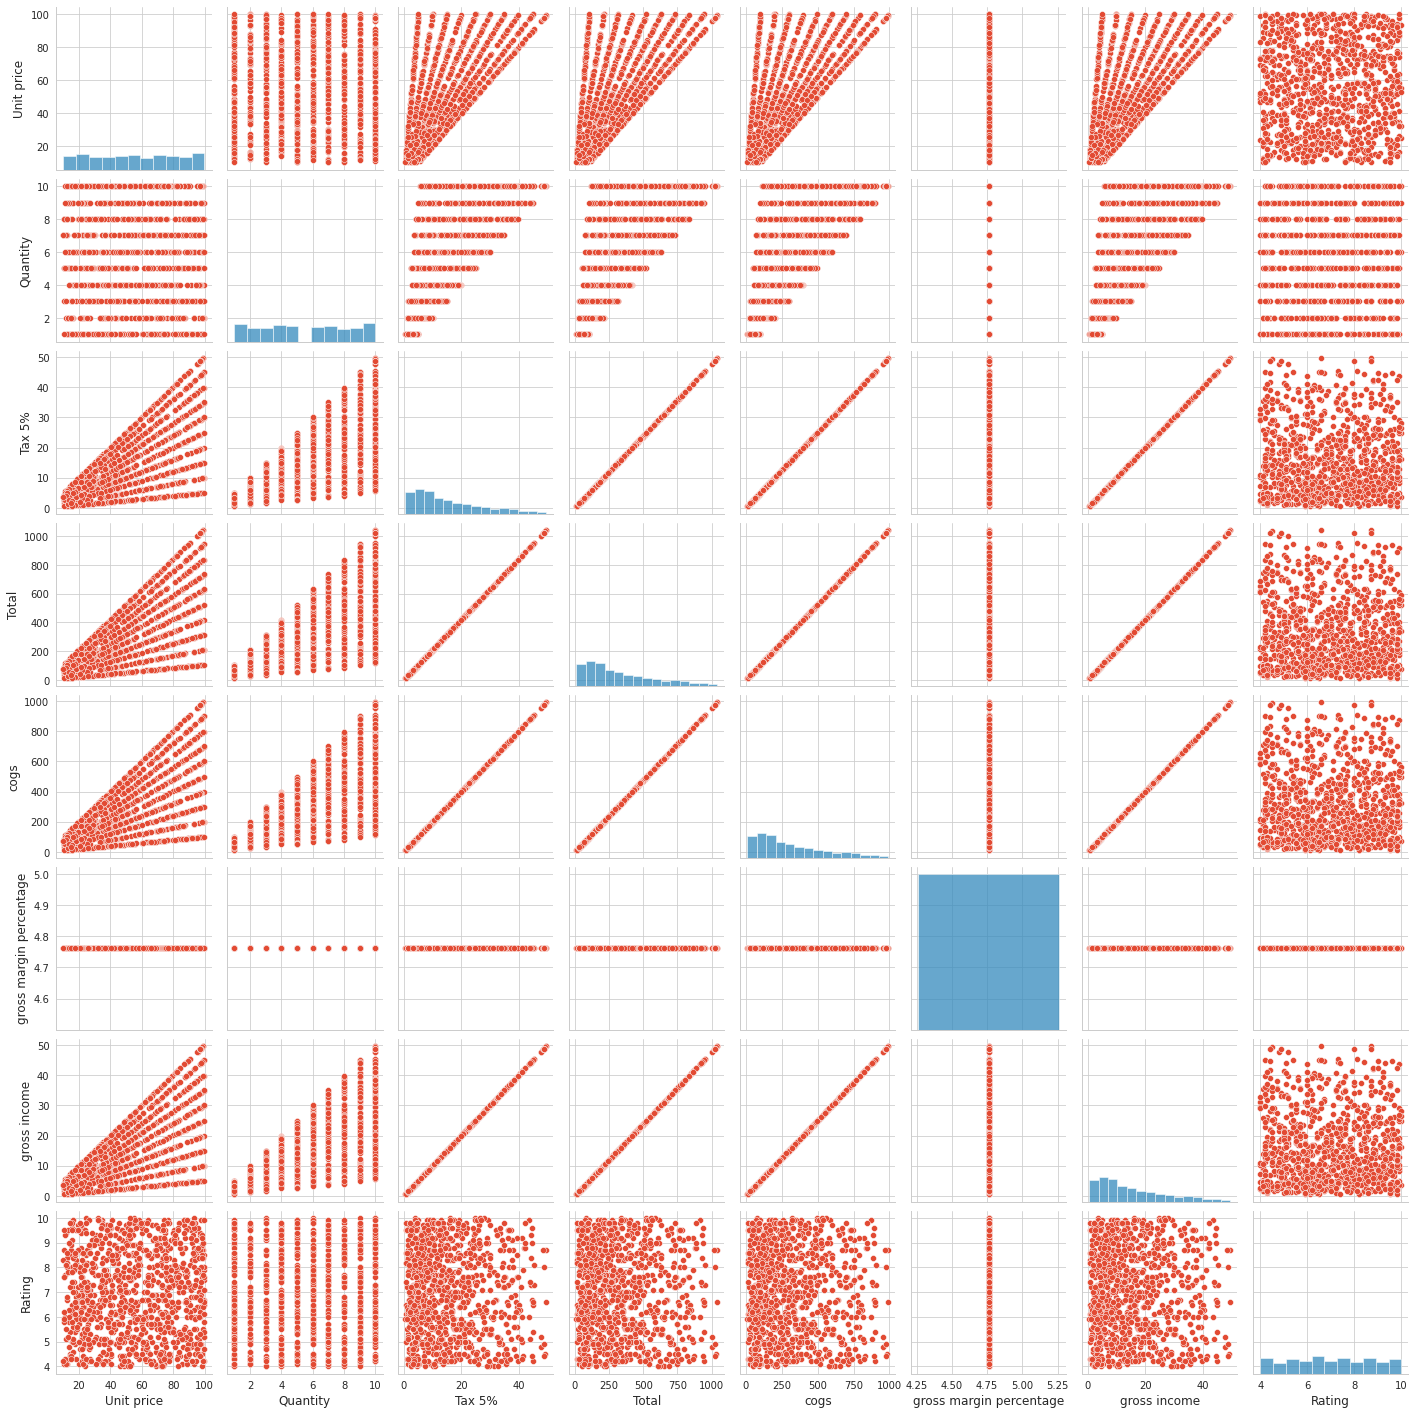

In [ ]:
sn.pairplot(data=df)

REGPLOT

This method is used to plot data and a linear regression model fit. ... If strings, these should correspond with column names in “df”. When pandas objects are used, axes will be labeled with the series name. df: This is dataframe where each column is a variable and each row is an observation.

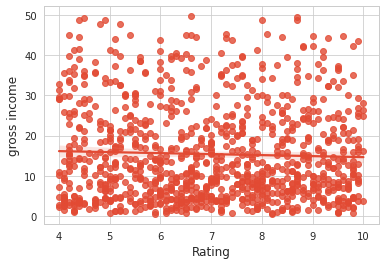

In [ ]:
sn.regplot(x='Rating', y= 'gross income', data=df)

In [ ]:
#to ddisplay dataframe columns
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [ ]:
#lets find the categorial variables
#create a list variable  of he list of columns in the dataframe
list_1=list(df.columns)

In [ ]:
#create a variable to store the categorical varibles found in the list created above in a for loop as list
list_cate=[]
for i in list_1:
    if df[i].dtype=='object':
        list_cate.append(i)

In [ ]:
import sklearn
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
for i in list_cate:
    df[i]=le.fit_transform(df[i])

In [ ]:
df

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,814,0,2,0,0,3,74.69,7,26.1415,548.9715,4,146,2,522.83,4.761905,26.1415,9.1
1,142,2,1,1,0,0,15.28,5,3.8200,80.2200,31,23,0,76.40,4.761905,3.8200,9.6
2,653,0,2,1,1,4,46.33,7,16.2155,340.5255,26,155,1,324.31,4.761905,16.2155,7.4
3,18,0,2,0,1,3,58.22,8,23.2880,489.0480,50,485,2,465.76,4.761905,23.2880,8.4
4,339,0,2,1,1,5,86.31,7,30.2085,634.3785,19,29,2,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,153,2,1,1,1,3,40.35,1,2.0175,42.3675,52,174,2,40.35,4.761905,2.0175,6.2
996,250,1,0,1,0,4,97.38,10,48.6900,1022.4900,25,342,2,973.80,4.761905,48.6900,4.4
997,767,0,2,0,1,2,31.84,1,1.5920,33.4320,20,154,0,31.84,4.761905,1.5920,7.7
998,308,0,2,1,1,4,65.82,1,3.2910,69.1110,64,261,0,65.82,4.761905,3.2910,4.1


In [ ]:
y=df['Gender']
x=df.drop('Gender',axis=1)

In [ ]:
df

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,814,0,2,0,0,3,74.69,7,26.1415,548.9715,4,146,2,522.83,4.761905,26.1415,9.1
1,142,2,1,1,0,0,15.28,5,3.8200,80.2200,31,23,0,76.40,4.761905,3.8200,9.6
2,653,0,2,1,1,4,46.33,7,16.2155,340.5255,26,155,1,324.31,4.761905,16.2155,7.4
3,18,0,2,0,1,3,58.22,8,23.2880,489.0480,50,485,2,465.76,4.761905,23.2880,8.4
4,339,0,2,1,1,5,86.31,7,30.2085,634.3785,19,29,2,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,153,2,1,1,1,3,40.35,1,2.0175,42.3675,52,174,2,40.35,4.761905,2.0175,6.2
996,250,1,0,1,0,4,97.38,10,48.6900,1022.4900,25,342,2,973.80,4.761905,48.6900,4.4
997,767,0,2,0,1,2,31.84,1,1.5920,33.4320,20,154,0,31.84,4.761905,1.5920,7.7
998,308,0,2,1,1,4,65.82,1,3.2910,69.1110,64,261,0,65.82,4.761905,3.2910,4.1


TRAINING AND TESTING DATA

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y, random_state=0, test_size=0.2)

In [ ]:
print(len(x_train))
print(len(x_test))
print(len(y_train))
print(len(y_test))

800
200
800
200


MODELS
1. KNeighborsClassifier

By default, the KNeighborsClassifier looks for the 5 nearest neighbors.Explicitly tell the classifier to use Euclidean distance for determining the proximity between neighboring points.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

#initialize the model
knn = KNeighborsClassifier(n_neighbors = 7)
#fit the model
knn.fit(x_train, y_train)


KNeighborsClassifier(n_neighbors=7)

In [ ]:
y_pred=knn.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",knn.score(x_train,y_train)*100)

Classification Report is:
               precision    recall  f1-score   support

           0       0.48      0.50      0.49       100
           1       0.47      0.45      0.46       100

    accuracy                           0.48       200
   macro avg       0.47      0.47      0.47       200
weighted avg       0.47      0.47      0.47       200

Confusion Matrix:
 [[50 50]
 [55 45]]
Training Score:
 63.87500000000001


2. SVC

In machine learning, support-vector machines (SVMs, also support-vector networks) are supervised learning models with associated learning algorithms that analyze data for classification and regression analysis.

In [ ]:
from sklearn.svm import SVC
#initialize model
svc = SVC()
svc.fit(x_train, y_train)


SVC()

In [ ]:
y_pred=svc.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",svc.score(x_train,y_train)*100)

Classification Report is:
               precision    recall  f1-score   support

           0       0.45      0.49      0.47       100
           1       0.44      0.40      0.42       100

    accuracy                           0.45       200
   macro avg       0.44      0.45      0.44       200
weighted avg       0.44      0.45      0.44       200

Confusion Matrix:
 [[49 51]
 [60 40]]
Training Score:
 55.25


3. Naive Bayes

It is a classification technique based on Bayes' Theorem with an assumption of independence among predictors. In simple terms, a Naive Bayes classifier assumes that the presence of a particular feature in a class is unrelated to the presence of any other feature.

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()

gnb.fit(x_train,y_train)

GaussianNB()

In [ ]:
y_pred=gnb.predict(x_test)
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print('classification report is: \n', classification_report(y_test,y_pred))
print('confusion matrix is: \n', confusion_matrix(y_test,y_pred))
print('Training score is: \n', gnb.score(x_train,y_train)*100)

classification report is: 
               precision    recall  f1-score   support

           0       0.54      0.37      0.44       100
           1       0.52      0.68      0.59       100

    accuracy                           0.53       200
   macro avg       0.53      0.53      0.51       200
weighted avg       0.53      0.53      0.51       200

confusion matrix is: 
 [[37 63]
 [32 68]]
Training score is: 
 54.625


4. DECISION TREE CLASSIFIER

Decision trees use multiple algorithms to decide to split a node into two or more sub-nodes. The creation of sub-nodes increases the homogeneity of resultant sub-nodes. ... The decision tree splits the nodes on all available variables and then selects the split which results in most homogeneous sub-nodes.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_depth=6,random_state=123, criterion='entropy')

#fit the model
dtree.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=123)

In [ ]:
#test the model
y_pred=dtree.predict(x_test)
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print('classification report is: \n', classification_report(y_test,y_pred))
print('confusion matrix is: \n', confusion_matrix(y_test,y_pred))
print('Training score is: \n', dtree.score(x_train,y_train)*100)

classification report is: 
               precision    recall  f1-score   support

           0       0.57      0.56      0.57       100
           1       0.57      0.58      0.57       100

    accuracy                           0.57       200
   macro avg       0.57      0.57      0.57       200
weighted avg       0.57      0.57      0.57       200

confusion matrix is: 
 [[56 44]
 [42 58]]
Training score is: 
 69.125



5.Random Forest Classifier

A random forest classifier. A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.



In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc =RandomForestClassifier()
#fit the model with the training data/ train the mode
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
#test the model for prediction
y_pred= rfc.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",rfc.score(x_train,y_train)*100)

Classification Report is:
               precision    recall  f1-score   support

           0       0.50      0.52      0.51       100
           1       0.49      0.47      0.48       100

    accuracy                           0.49       200
   macro avg       0.49      0.49      0.49       200
weighted avg       0.49      0.49      0.49       200

Confusion Matrix:
 [[52 48]
 [53 47]]
Training Score:
 100.0


6. AdaBoostClassifier

An AdaBoost classifier is a meta-estimator that begins by fitting a classifier on the original dataset and then fits additional copies of the classifier on the same dataset but where the weights of incorrectly classified instances are adjusted such that subsequent classifiers focus more on difficult cases.

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
abc= AdaBoostClassifier(base_estimator=None)
abc.fit(x_train, y_train)


AdaBoostClassifier()

In [ ]:
y_pred = abc.predict(x_test)
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",abc.score(x_train,y_train)*100)

Classification Report is:
               precision    recall  f1-score   support

           0       0.51      0.48      0.49       100
           1       0.50      0.53      0.52       100

    accuracy                           0.51       200
   macro avg       0.51      0.51      0.50       200
weighted avg       0.51      0.51      0.50       200

Confusion Matrix:
 [[48 52]
 [47 53]]
Training Score:
 67.25


7. Gradient Boosting Classifier

Gradient boosting classifiers are a group of machine learning algorithms that combine many weak learning models together to create a strong predictive model. Decision trees are usually used when doing gradient boosting.

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(x_train,y_train)

GradientBoostingClassifier()

In [ ]:
y_pred = gbc.predict(x_test)
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import  r2_score
from sklearn.metrics import mean_squared_error
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",gbc.score(x_train,y_train)*100)

Classification Report is:
               precision    recall  f1-score   support

           0       0.52      0.53      0.52       100
           1       0.52      0.51      0.52       100

    accuracy                           0.52       200
   macro avg       0.52      0.52      0.52       200
weighted avg       0.52      0.52      0.52       200

Confusion Matrix:
 [[53 47]
 [49 51]]
Training Score:
 87.625


In [ ]:
data = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
data

,Actual,Predicted
993,1,1
859,0,0
298,1,0
553,1,0
672,0,0
...,...,...
679,1,0
722,1,1
215,1,1
653,1,0


8. XGBoost Classifier
XGBoost is a popular and efficient open-source implementation of the gradient boosted trees algorithm. Gradient boosting is a supervised learning algorithm, which attempts to accurately predict a target variable by combining the estimates of a set of simpler, weaker models.

In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1, max_depth = 5, alpha = 10, n_estimators = 10)
xgb.fit(x_train,y_train)

XGBClassifier(alpha=10, colsample_bytree=0.3, max_depth=5, n_estimators=10,
              objective='reg:squarederror')

In [ ]:
y_pred=xgb.predict(x_test)
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import  r2_score
from sklearn.metrics import mean_squared_error
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",xgb.score(x_train,y_train)*100)


Classification Report is:
               precision    recall  f1-score   support

           0       0.45      0.46      0.45       100
           1       0.44      0.43      0.44       100

    accuracy                           0.45       200
   macro avg       0.44      0.45      0.44       200
weighted avg       0.44      0.45      0.44       200

Confusion Matrix:
 [[46 54]
 [57 43]]
Training Score:
 78.125


9. ExtraTreesClassifier

Extremely Randomized Trees Classifier(Extra Trees Classifier) is a type of ensemble learning technique which aggregates the results of multiple de-correlated decision trees collected in a “forest” to output it's classification result.

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
etc = ExtraTreesClassifier(n_estimators = 100, random_state=0)
etc.fit(x_train,y_train)


ExtraTreesClassifier(random_state=0)

In [ ]:
y_pred=etc.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print('The Classification Report is\n',classification_report(y_test,y_pred))
print('Confusion matrix is\n',confusion_matrix(y_test,y_pred))
print('Accuracy Score is\n',accuracy_score(y_test,y_pred))
print('Training Score is \n',etc.score(x_train,y_train)*100)

The Classification Report is
               precision    recall  f1-score   support

           0       0.53      0.54      0.53       100
           1       0.53      0.52      0.53       100

    accuracy                           0.53       200
   macro avg       0.53      0.53      0.53       200
weighted avg       0.53      0.53      0.53       200

Confusion matrix is
 [[54 46]
 [48 52]]
Accuracy Score is
 0.53
Training Score is 
 100.0


10.Bagging Classifier

A Bagging classifier is an ensemble meta-estimator that fits base classifiers each on random subsets of the original dataset and then aggregate their individual predictions (either by voting or by averaging) to form a final prediction. ... The base estimator to fit on random subsets of the dataset.

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn import tree
model=BaggingClassifier(tree.DecisionTreeClassifier(random_state=1))
model.fit(x_train,y_train)
model.score(x_test,y_test)


0.44

In [ ]:
data = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
data

,Actual,Predicted
993,1,1
859,0,0
298,1,1
553,1,0
672,0,1
...,...,...
679,1,1
722,1,1
215,1,0
653,1,0


In CONCLUSION :

THE ACCURACIES OF THE DIFFERENT MODELS ARE:

KNeighbors Classifier= 63.88 %

SVC= 55.25 %

Naiye Bayes= 54.63 %

Decision Tree Classifier= 69.13 %

Random Forest Classifier= 100 %

Ada Boost Classifier= 67.25 %

Gradient Boosting Classifier= 87.62 %

XGB Classifier= 78.12 %

Extra Trees Classifier= 100 %
Bagging Classifier = 49.5%

We have a good accuracy of about 100 % using Random Forest Classifier and Extra Trees Classifier which is quite well for the given dataset.

The accuracy of other models can be increased further by HyperTuning.